# Udacity: Programa Nanodegree - FDS I (Projeto II)
   # Análise exploratória dos dados (Titanic)
   # Aluno: Balbino S. Junior

In [2]:
#Carregando as bibliotecas do Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 

In [3]:
#Carregando o Dataset
dftitan = pd.read_csv('titanic-data-6.csv')

In [4]:
#Visualizando o número de linhas e colunas do dataset
dftitan.shape

(891, 12)

In [5]:
#Visualizando os dados para se ter uma idéia da sua estrutura
dftitan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Para facilitar o manuseio dos dados acima, irei ajustar os nomes das colunas para letras minusculas
dftitan.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirmando os ajustes
dftitan.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
# Exibindo linhas com valores faltantes
dftitan.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [8]:
# A variável "cabin" está sendo excluida por conter mais de 77% de valores faltantes.
# No meu entendimento não irá contribuir para as análise
dftitan.drop("cabin", axis=1, inplace=True)

In [9]:
# Exibindo linhas com valores faltantes após o ajuste
dftitan.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
embarked         2
dtype: int64

In [10]:
# Uma das variáveis independentes escolhidas para as análises ("age") possui 177 registros nulos. Sendo assim, decidi fazer 
# um ajuste usando a média dos valores não nulos, para susbtituir os valores nulos. A idéia de usar a média é para evitar 
# distorções ou uma forte influência nos dados.
mean_age = float("{0:.2f}".format(dftitan['age'].dropna().mean()))
dftitan['age'] = dftitan['age'].fillna(mean_age)

In [11]:
# Exibindo linhas com valores faltantes após o ajuste
dftitan.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
dtype: int64

In [12]:
# Descartando algumas variáveis do conjunto de dados. As variáveis: "name" e "ticket" são do tipo string e dificilmente
# poderiam ser usadas para a realização de análises.
dftitan.drop(['name', 'ticket', 'embarked'], axis=1, inplace=True)

# confirmando as mudanças
dftitan.head(1)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
0,1,0,3,male,22.0,1,0,7.25


In [13]:
dftitan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [14]:
# Farei um agrupamento das colunas sibsp e parch. Nos casos em o somatório dessas variáveis for maior ou igual a 1, 
# indica que o passageiro possui pelo menos um familiar à bordo. Caso não possua, o valor da variável será 0 (zero).
dftitan['family'] = np.where((dftitan['sibsp'] + dftitan['parch']>= 1) , 1, 0)

In [15]:
#Excluindo as variáveis "sibsp" e "parch" pois as mesmas estão sendo representadas pela coluna "family"
dftitan.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [16]:
#Verificando os ajustes
dftitan.head(1)

,passengerid,survived,pclass,sex,age,fare,family
0,1,0,3,male,22.0,7.25,1


In [17]:
# Verificando se ainda existem linhas com valores faltantes
dftitan.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
fare           0
family         0
dtype: int64

# Questão 1: A idade dos passageiros contribuiu para a sobrevivência dos mesmos?

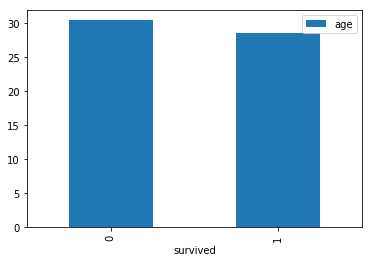

In [64]:
# Cálculo da média da idade para o grupo de sobreviventes
dftitan[['survived', 'age']].groupby(['survived']).mean().plot(kind='bar')

In [59]:
# Cálculo da média da idade (agrupado pelas variáveis: "pclass", "survived")
pclass_surv = dftitan[['pclass', 'survived', 'age']].groupby(['pclass','survived']).mean()
pclass_surv

age
pclass survived           
1      0         40.896250
       1         34.784706
2      0         33.267010
       1         26.076207
3      0         27.417742
       1         23.232941

## Questão 1: Conclusão

# Questão 2: Qual a relação entre o sexo dos passageiros e o número de sobreviventes?

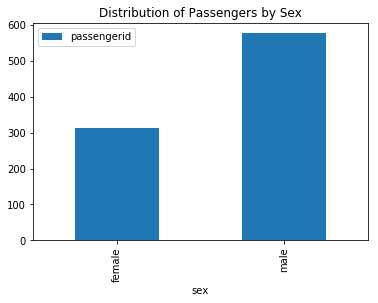

In [69]:
# Obtendo a distribuição de passageiros por sexo
dftitan[['sex', 'passengerid']].groupby(['sex']).count().plot(kind='bar', title = 'Distribution of Passengers by Sex')

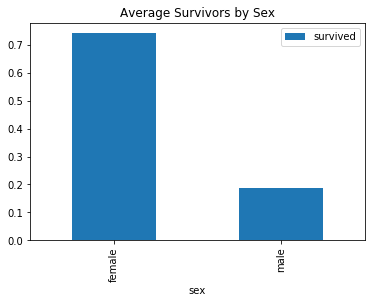

In [70]:
# Obtendo a média de sobreviventes por sexo
dftitan[['survived', 'sex']].groupby(['sex']).mean().plot(kind='bar', title = 'Average Survivors by Sex')

In [37]:
# Distribuição de sobreviventes por classe e sexo
dftitan[['pclass', 'sex', 'survived', 'passengerid']].groupby([ 'pclass', 'sex', 'survived']).count()

passengerid
pclass sex    survived             
1      female 0                   3
              1                  91
       male   0                  77
              1                  45
2      female 0                   6
              1                  70
       male   0                  91
              1                  17
3      female 0                  72
              1                  72
       male   0                 300
              1                  47

## Questão 2: Conclusões

# Questão 3: Qual a influência do perfil financeiro dos passageiros para a sua sobrevivência?

## Primeira análise: verificar como as variáveis "pclass" e "survived" estão relacionadas.

In [36]:
# Verificando a média de sobreviventes em cada uma das classes
dftitan[['pclass', 'survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [37]:
# Verificando a quantidade de sobreviventes em cada uma das classes
dftitan[['survived', 'pclass','passengerid']].groupby(['survived', 'pclass']).count()

passengerid
survived pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

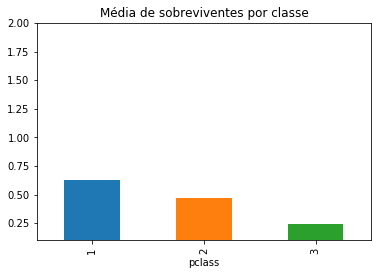

In [38]:
# Visualizando através do gráfico de barra a média de sobreviventes em cada uma das classes
dftitan.groupby(['pclass']).mean()['survived'].plot(kind='bar', ylim=(0.1,2.0), title='Média de sobreviventes por classe')

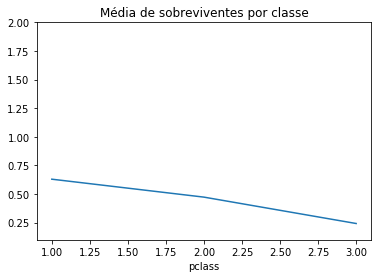

In [39]:
# Visualizando através do gráfico de barra a média de sobreviventes em cada uma das classes
dftitan.groupby(['pclass']).mean()['survived'].plot(kind='line', ylim=(0.1,2.0), title='Média de sobreviventes por classe')

## Conclusões (Primeira Análise)

## Segunda análise: verificar como as variáveis: "fare" e "survived" estão relacionadas.

In [86]:
#Calculando a media do conjunto de dados com base na variável "fare"
mean_fare = dftitan['fare'].mean()

#Dividindo os dados em 2 grupos a partir da mediana
low_fare  = dftitan.query('fare <= @mean_fare')
high_fare = dftitan.query('fare > @mean_fare')

#Calculando as médias de sobreviventes em cada um dos conjuntos de dados
low_surv_mean  = low_fare['survived'].mean()
high_surv_mean = high_fare['survived'].mean()


In [87]:
#Visualizando como ficou a distribuição do conjunto de dados
low_fare.shape, high_fare.shape

((680, 7), (211, 7))

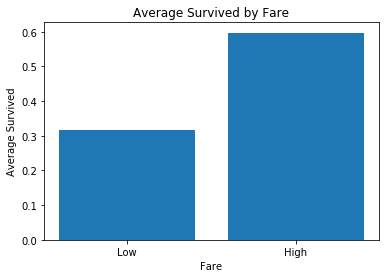

In [89]:
# Criação do gráfico de barras para contribuir ao questionamento
locations = [1, 2]
heights   = [low_surv_mean, high_surv_mean]
labels    = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Average Survived');

## Conclusões (Segunda Análise)

## Terceira análise: visualizar a distribuição proporcional entre sobreviventes e não- sobreviventes em cada uma das classes.

In [90]:
# Obtendo as contagens de sobrevidentes para cada classe
surv_counts = dftitan.groupby(['survived', 'pclass']).count()['passengerid']
surv_counts

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: passengerid, dtype: int64

In [92]:
# Obtendo a contagem total de sobrevidentes/não sobreviventes
surv_total = dftitan.groupby(['survived']).count()['passengerid']
surv_total

survived
0    549
1    342
Name: passengerid, dtype: int64

In [93]:
# Obtendo as proporções de sobreviventes em cada uma das classes
surv_proportions = surv_counts[1] / surv_total[1]
surv_proportions

pclass
1    0.397661
2    0.254386
3    0.347953
Name: passengerid, dtype: float64

In [94]:
# Obtendo as proporções de não sobreviventes em cada uma das classes 
notsurv_proportions = surv_counts[0] / surv_total[0]
notsurv_proportions

pclass
1    0.145719
2    0.176685
3    0.677596
Name: passengerid, dtype: float64

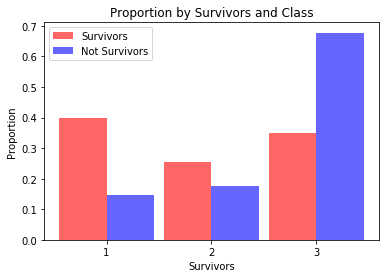

In [97]:
# Montagem das barras
ind        = np.arange(len(surv_proportions))  # a localização no eixo x dos grupos
width      = 0.45                              # a largura das barras
surv_bars  = plt.bar(ind, surv_proportions, width, color='r', alpha=.6, label='Survivors')
nsurv_bars = plt.bar(ind + width, notsurv_proportions, width, color='b', alpha=.6, label='Not Survivors')

# Definição dos título e rótulos
plt.ylabel('Proportion')
plt.xlabel('Survivors')
plt.title('Proportion by Survivors and Class')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels    = surv_proportions.index # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.legend()

## Conclusões (Terceira análise)

## Questão 3 - Conclusão